In [1]:
import json
import numpy as np
measures = dict()
measuresInsights = list()
def readFile(fileName):
    global measures
    with open(fileName, "r") as f:
        content = f.readlines()

    try:
        for line in content:
            parsedLine = line.replace("\n", "").strip()
            parsedContent = parsedLine.split(":")
            if parsedContent[0] not in list(measures.keys()):
                measures[parsedContent[0]] = [float(parsedContent[1])]
            else:
                measures[parsedContent[0]].append(float(parsedContent[1]))
        print("File parsed succesfully!")
    except:
        raise Exception("An error occured")

def dataInsigths():
    global measuresInsights
    for measure in measures.items():
        measureTimesAsArr = np.array(measure[1])
        measuresInsights.append((measure[0], np.average(measureTimesAsArr)))

readFile("matrixOutputNotVerboseV2.log")
dataInsigths()
# print(json.dumps(measures, indent=1))
# print(measuresInsights)

File parsed succesfully!


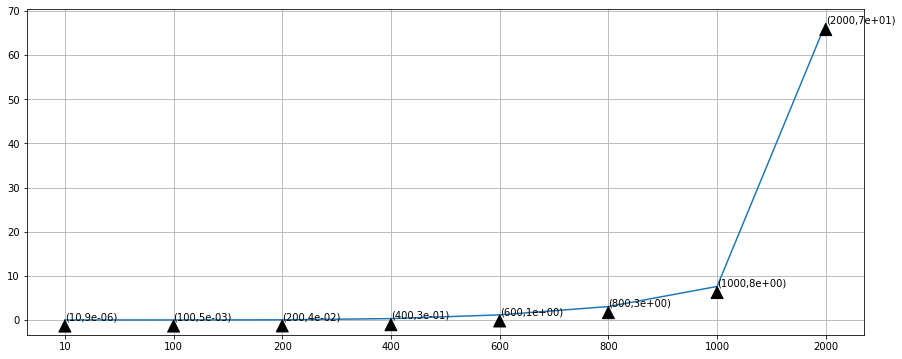

In [4]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (15,6)

def makePlot():
    global measuresInsights
    fig = plt.figure()
    ax = fig.add_subplot(111)
    matrixSizes_x = []
    timeConsumedByEachSize_y = []

    for measure in measuresInsights:
        matrixSizes_x.append(measure[0])
        timeConsumedByEachSize_y.append(measure[1])


    ax.plot(matrixSizes_x, timeConsumedByEachSize_y, )
    for xy in zip(matrixSizes_x, timeConsumedByEachSize_y):                                       # <--
        ax.annotate('(%s,%2.e)' % xy, xy=xy, arrowprops=dict(facecolor='black', shrink=0.05)) # <--

    ax.grid()
    plt.show()

makePlot()

